# <center> Практична робота 03 </center> <center> Завантаження та обробка даних </center>

___Завдання:___
1. Базові операції з датафреймами та серіями (1 бал).
2. Фільтрація, групування та агрегація даних (3 бали).
3. Очистка датасетів за допомогою бібліотеки Pandas (2 бали).

___За прострочку:___ пройти [туторіали](https://makeschool.org/mediabook/oa/tutorials/titanic-dataset-tutorial-an-intro-to-data-analysis-and-statistics-n40/getting-our-bearings/) на закріплення

### <p style='text-align: right;'> Виконала студентка групи <ins>2П-20</ins> </p><p style='text-align: right;'> <ins>Дворяківська Єлизавета </ins> </p>

## 1. Базові операції з датафреймами та серіями (1 бал)
Бібліотека pandas є важливим інструментом аналітики даних для наукових дистрибутивів Python (Anaconda, WinPython, Canopy тощо). Вона була представлена Весом Маккінні (Wes McKinney) у 2008 році, проте суттєву популярність набула після 2012 року.

Ключовим об’єктом pandas виступає датафрейм (кадр даних, data frame), який представляє табличну структуру даних з рядками (записами) і стовпцями (полями). Також датафрейм підтримує індексацію, що робить вибірку, комбінування та перетворення даних досить очевидним. 

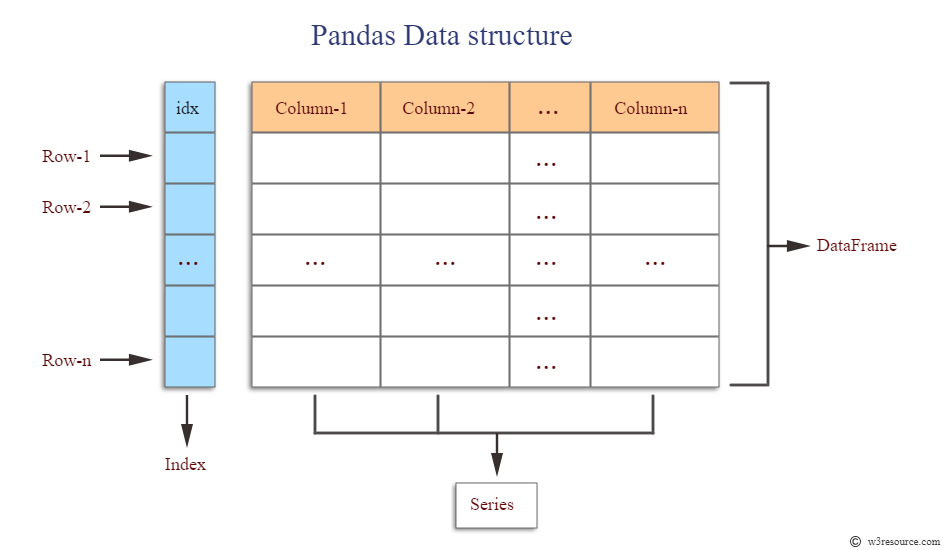

Стовпці та рядки таблиці мають тип Series та побудовані на базі NumPy-масивів, маючи на додачу axis labels (назву стовпця) та змогу зберігати нечислові дані

https://towardsdatascience.com/a-practical-introduction-to-pandas-series-9915521cdc69
#### Створення серій
1) з Python-списку шляхом передачі в функцію Series().

Усі значення представляються в порядку їх появи в початковому списку.

In [ ]:
import pandas as pd
companies = ['Google', 'Microsoft', 'Facebook', 'Apple']
pd.Series(companies)

0       Google
1    Microsoft
2     Facebook
3        Apple
dtype: object

Зверніть увагу, що тип даних dtype: object, що є внутрішнім для Pandas позначенням рядків. Також є додатковий стовпчик Index, який тут відповідає індексам елементів списку. Перевагою Pandas Series є можливість представити індекс за допомогою не тільки числового типу. Щоб задати власний набір індексів передається список з цим набором у параметр index:

In [ ]:
pd.Series(companies, index=[100,101,102,103])



100       Google
101    Microsoft
102     Facebook
103        Apple
dtype: object

In [ ]:
pd.Series(companies, index=['GOOGL','MSFT','FB','AAPL'])

GOOGL       Google
MSFT     Microsoft
FB        Facebook
AAPL         Apple
dtype: object

Серію можна створити зі словника. Якщо індекси спеціально не задані,ними стануть ключі словника:

In [ ]:
companies = {
    'a': 'Google',
    'b': 'Microsoft',
    'c': 'Facebook',
    'd': 'Apple'
}
pd.Series(companies)

a       Google
b    Microsoft
c     Facebook
d        Apple
dtype: object

In [ ]:
pd.Series(
    companies, 
    index=['a', 'b', 'd']
)

a       Google
b    Microsoft
d        Apple
dtype: object

Ще один спосіб створення - зі скаляру. Тоді необхідно задати потрібний набір індексів:

In [ ]:
pd.Series(10, index=[100, 101, 102, 103])

100    10
101    10
102    10
103    10
dtype: int64

Також існує можливість створювати серії з завантажених файлів. Наприклад, за допомогою функції read_csv(), яка завантажує csv-файли в датафрейми. Якщо існує потреба імпортувати дані в Series замість DataFrame, можна надати додаткові аргументи usecols та squeeze. Саме squeeze=True стисне датафрейм з одного стовпця до однієї серії:

```python
pd.read_csv('data.csv', usecols=['product'], squeeze=True)
```

#### Отримання даних із серій

Для отримання даних можна використовувати індекси та зрізи:

In [ ]:
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s.shape)

s[0]

(5,)


1

In [ ]:
s[:3]

a    1
b    2
c    3
dtype: int64

In [ ]:
s[-3:]

c    3
d    4
e    5
dtype: int64

In [ ]:
s[2:4]

c    3
d    4
dtype: int64

In [ ]:
s['a']

1

In [ ]:
s[['a','c','d']]

a    1
c    3
d    4
dtype: int64

Pandas Series є типом Python-об'єктів, тому має власний набір атрибутів і методів. Атрибут values повертає чисті значення серії без індексів:

In [ ]:
companies = ['Google', 'Microsoft', 'Facebook', 'Apple']
s = pd.Series(companies)
print(s.values)
print(s.index)

['Google' 'Microsoft' 'Facebook' 'Apple']
RangeIndex(start=0, stop=4, step=1)


Атрибут is_unique визначає, чи всі значення серії унікальні:

In [ ]:
s.is_unique

True

Тип даних у серії можна отримати з атрибуту dtype. Тут О - це скорочення від object

In [ ]:
s.dtype

dtype('O')

Розмір та форму серії можна отримати за допомогою атрибутів size і shape відповідно. Атрибут shape быльш корисний з датафреймами та багатовимірними даними. Кількість вимірів дозволяє виявити атрибут ndim:

In [ ]:
print(s.size)
print(s.shape)
s.ndim

4
(4,)


1

Основні методи об'єктів типу Series відповідають за відображення рядків, виконання агрегаційних операцій, сортування, роботу з відсутніми значеннями, пошук та ін. Показати певну кількість рядків дозволяють методи head() і tail() від початку та з кінця відповідно:

In [ ]:
prices = [10, 5, 3, 2.5, 8, 11] # 2.5, 3, 5, 8, 10, 11
s = pd.Series(prices)
s.head()

0    10.0
1     5.0
2     3.0
3     2.5
4     8.0
dtype: float64

In [ ]:
print(s.head(2))
s.tail(2)

0    10.0
1     5.0
dtype: float64


4     8.0
5    11.0
dtype: float64

Для агрегації даних (отримання однієї числової характеристики для набору) застосовуються такі методи, як mean(), sum(), product(), max(), min() та median(). Виконати разом кілька агрегаційних операцій дозволяє метод agg():

In [ ]:
s.agg(['mean','sum','product', 'median'])

mean           6.583333
sum           39.500000
product    33000.000000
median         6.500000
dtype: float64

In [ ]:
print(s.mean())
print(s.sum())
s.product()

6.583333333333333
39.5


33000.0

Медіана - це значення, яке знаходиться посередині в відсортованій послідовності:
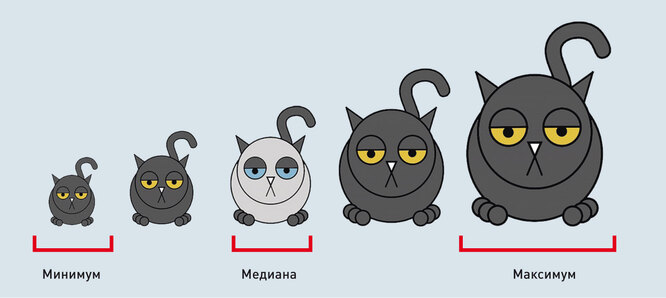

Якщо кількість елементів у послідовності парна, то медіана береться як середнє двох значень посередині. Тут це 5 і 8, середнє - 6.5

In [ ]:
print(sorted(s))
s.median()

[2.5, 3.0, 5.0, 8.0, 10.0, 11.0]


6.5

Для підрахунку унікальних значень можуть застосовуватись методи unique(), nunique() та value_counts():

In [ ]:
s = pd.Series(['a','b','b','a','a'])
print(s.unique())
print(s.nunique())
s.value_counts() 

['a' 'b']
2


a    3
b    2
dtype: int64

Сортування може відбуватись за значеннями або за індексами. Відповідні методи: sort_values() та sort_index():

In [ ]:
# типово від меншого до більшого
print(s.sort_values())

# від більшого до меншого
print(s.sort_values(ascending=False))

# із внесенням змін у початкову серію
s.sort_values(inplace=True)
s

0    a
3    a
4    a
1    b
2    b
dtype: object
1    b
2    b
0    a
3    a
4    a
dtype: object


0    a
3    a
4    a
1    b
2    b
dtype: object

In [ ]:
print(s.sort_index())
print(s.sort_index(ascending=False))
s.sort_index(inplace=True)
s

0    a
1    b
2    b
3    a
4    a
dtype: object
4    a
3    a
2    b
1    b
0    a
dtype: object


0    a
1    b
2    b
3    a
4    a
dtype: object

Обробляти відсутні значення в комірках дозволяє метод isna(). Він повертає булеву серію того ж розміру, де для відсутніх значень буде вказано True, а для решти - False:

In [ ]:
import numpy as np
s = pd.Series([1, 2, 3, np.nan, np.nan])
s.isna()

0    False
1    False
2    False
3     True
4     True
dtype: bool

Часто потрібно підраховувати, скільки в серії відсутніх значень. Для цього можна використовувати методи:
- sum() разом з isna() - поверне кількість відсутніх значень
- count() - поверне кількість присутніх значень

In [ ]:
print(s.isna().sum())
s.count()

2


3

Для пошуку найбільших та найменших значень популярними методами є nlargest() та nsmallest(). Без аргументу вони повертають топ-5.

In [ ]:
s.nlargest()

2    3.0
1    2.0
0    1.0
dtype: float64

In [ ]:
s.nlargest(2)

2    3.0
1    2.0
dtype: float64

Також доступні методи, які здійснюють пошук за допомогою логічних операторів:
- gt(): greater than, >
- ge(): greater than or equal, >=
- eq(): equal, ==
- le(): less than or equal, <=
- lt(): less than, <
- ne(): not equal, !=

In [ ]:
# те ж, що і s <= 5
# s.le(5, fill_value=0)

Часто аналітик має досить обмежені знання щодо даних у порівнянні з тим, хто ці дані створював. Потрібно вміти швидко розбиратись, що необхідно знайти навіть без заглиблення в предметну область. У таких випадках слід задати собі питання, що цікавить замовника в першу чергу. Подібні питання можуть набувати вигляду:
-	Як записи (рядки) датасету унікально ідентифікуються?
-	Скільки рядків та стовпців у датасеті?
-	Які ключові категорійні величини та частоти зустрічей кожного значення?
-	Як розподілені важливі неперервні величини?
-	Як величини можуть бути пов’язаними – наприклад, як розподіл неперервної величини може змінюватись залежно від категорій даних?
-	Які значення виходять за межі очікуваного діапазону та як розподілені відсутні значення?

Такий попередній аналіз корисний навіть тоді, коли структура даних уже знайома. Зокрема, при отриманні нових даних через визначені проміжки часу. Тоді стають в нагоді вище розглянуті атрибути й методи серій, що працюватимуть вже на рівні датафрейму:

In [ ]:
# датасет щодо нобелівських лауреатів (буде в задачах до питання 2)
url = 'https://raw.githubusercontent.com/x5or6/A-Visual-History-of-Nobel-Prize-Winners/master/archive.csv'
nobel_df = pd.read_csv(url, sep = ',')
nobel_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [ ]:
print(nobel_df.ndim)
print(nobel_df.size)
print(nobel_df.shape)
print(len(nobel_df))
print(nobel_df.columns.to_list())

2
17442
(969, 18)
969
['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID', 'Laureate Type', 'Full Name', 'Birth Date', 'Birth City', 'Birth Country', 'Sex', 'Organization Name', 'Organization City', 'Organization Country', 'Death Date', 'Death City', 'Death Country']


In [ ]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [ ]:
nobel_df.describe()  # зводить статистику по числових даних, у нас 2 стовпцях int64

,Year,Laureate ID
count,969.000000,969.000000
mean,1970.287926,470.152735
std,32.937498,274.586623
min,1901.000000,1.000000
25%,1947.000000,230.000000
50%,1976.000000,462.000000
75%,1999.000000,718.000000
max,2016.000000,937.000000


### Формати даних для завантаження: 
1. CSV
2. Excel
3. HTML
4. JSON та ін.

Розглянемо зчитування CSV та Excel-файлів і отримання описової статистики

#### CSV

In [ ]:
# імпортуємо бібліотеку pandas та налаштовуємо середовище для спрощення перегляду
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)

In [ ]:
# зчитуємо файл даних, задаємо нові заголовки та парсимо стовпчик для дат
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Data-Cleaning-Cookbook/master/Chapter01/data/landtempssample.csv'
landtemps = pd.read_csv(url, # 'data/stdent_scores.csv'
    names=['stationid','year','month','avgtemp','latitude', 'longitude','elevation','station','countryid','country'],
    skiprows=1,
    parse_dates=[['month','year']],
    delimiter=',',
    low_memory=False)

type(landtemps)

pandas.core.frame.DataFrame

In [ ]:
# отримуємо швидкий огляд структури файлу
landtemps.head(15)

,month_year,stationid,avgtemp,latitude,...,elevation,station,countryid,country
0,2000-04-01,USS0010K01S,5.27,39.90,...,"2,773.70",INDIAN_CANYON,US,United States
1,1940-05-01,CI000085406,18.04,-18.35,...,58.00,ARICA,CI,Chile
2,2013-12-01,USC00036376,6.22,34.37,...,61.00,SAINT_CHARLES,US,United States
3,1963-02-01,ASN00024002,22.93,-34.28,...,65.50,BERRI_IRRIGATION,AS,Australia
4,2001-11-01,ASN00028007,NaN,-14.78,...,79.40,MUSGRAVE,AS,Australia
5,1991-04-01,USW00024151,5.59,42.15,...,"1,362.50",MALAD_CITY,US,United States
6,1993-12-01,RSM00022641,-10.17,63.90,...,13.00,ONEGA,RS,Russia
7,1943-01-01,USC00470307,-10.43,43.33,...,317.00,ARLINGTON,US,United States
8,1996-08-01,FRM00007579,21.87,44.13,...,55.00,ORANGE,FR,France
9,2015-02-01,USS0009J08S,-2.93,40.90,...,"2,773.70",HICKERSON_PARK,US,United States


In [ ]:
print(landtemps.dtypes)
print(landtemps.shape)

month_year    datetime64[ns]
stationid             object
avgtemp              float64
latitude             float64
longitude            float64
elevation            float64
station               object
countryid             object
country               object
dtype: object
(100000, 9)


In [ ]:
# виправляємо назву стовпця з датою
landtemps.rename(columns={'month_year':'measuredate'}, inplace=True)
landtemps.dtypes

measuredate    datetime64[ns]
stationid              object
avgtemp               float64
latitude              float64
longitude             float64
elevation             float64
station                object
countryid              object
country                object
dtype: object

In [ ]:
landtemps.avgtemp.describe()

count   85,554.00
mean        10.92
std         11.52
min        -70.70
25%          3.46
50%         12.22
75%         19.57
max         39.95
Name: avgtemp, dtype: float64

In [ ]:
# isnull() повертає True для кожного відсутнього значення у стовпці та False інакше.
# sum() підрахує загальну кількість порожніх комірок, оскільки True може трактуватись як 1
landtemps.isnull().sum()

measuredate        0
stationid          0
avgtemp        14446
latitude           0
longitude          0
elevation          0
station            0
countryid          0
country            5
dtype: int64

In [ ]:
# видаляємо рядки з відсутніми значеннями
# параметр subset методу dropna() вказує поле, відповідно до якого будуть видалятись записи
# параметр inplace типово рівний False, проте так внесені зміни не будуть зберігатись
landtemps.dropna(subset=['avgtemp'], inplace=True)

# бачимо, що кількість рядків зменшилась на 14446 
landtemps.shape

(85554, 9)

Детальніше про особливості роботи read_csv() можна почитати [тут](https://towardsdatascience.com/all-the-pandas-read-csv-you-should-know-to-speed-up-your-data-analysis-1e16fe1039f3).

### Excel

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 5)

In [ ]:
url = "https://github.com/PacktPublishing/Python-Data-Cleaning-Cookbook/blob/master/Chapter01/data/GDPpercapita.xlsx?raw=true"
# імпортуємо дані щодо land temperature
percapitaGDP = pd.read_excel(url,
   sheet_name="OECD.Stat export",
   skiprows=4,
   skipfooter=1,
   usecols="A,C:T")

In [ ]:
percapitaGDP.head(100)

,Year,2001,...,2017,2018
0,Metropolitan areas,NaN,...,NaN,NaN
1,AUS: Australia,..,...,..,..
2,AUS01: Greater Sydney,43313,...,50578,49860
3,AUS02: Greater Melbourne,40125,...,43025,42674
4,AUS03: Greater Brisbane,37580,...,46876,46640
...,...,...,...,...,...
95,DE008: Leipzig,28854,...,39782,39974
96,DE009: Dresden,29610,...,38879,39456
97,DE011: Dusseldorf,63581,...,70611,71192
98,DE012: Bremen,41558,...,48296,48711


In [ ]:
percapitaGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    702 non-null    object
 1   2001    701 non-null    object
 2   2002    701 non-null    object
 3   2003    701 non-null    object
 4   2004    701 non-null    object
 5   2005    701 non-null    object
 6   2006    701 non-null    object
 7   2007    701 non-null    object
 8   2008    701 non-null    object
 9   2009    701 non-null    object
 10  2010    701 non-null    object
 11  2011    701 non-null    object
 12  2012    701 non-null    object
 13  2013    701 non-null    object
 14  2014    701 non-null    object
 15  2015    701 non-null    object
 16  2016    701 non-null    object
 17  2017    701 non-null    object
 18  2018    701 non-null    object
dtypes: object(19)
memory usage: 104.3+ KB


In [ ]:
# перейменуємо стовпчик Year на metro
percapitaGDP.rename(columns={'Year':'metro'}, inplace=True)
percapitaGDP.metro.str.startswith(' ').any()
percapitaGDP.metro.str.endswith(' ').any()
percapitaGDP.metro = percapitaGDP.metro.str.strip()

In [ ]:
# перетворюємо data columns to numeric
for col in percapitaGDP.columns[1:]:
  percapitaGDP[col] = pd.to_numeric(percapitaGDP[col], errors='coerce')
  percapitaGDP.rename(columns={col:'pcGDP'+col}, inplace=True)

In [ ]:
percapitaGDP.head()

,metro,pcGDP2001,...,pcGDP2017,pcGDP2018
0,Metropolitan areas,NaN,...,NaN,NaN
1,AUS: Australia,NaN,...,NaN,NaN
2,AUS01: Greater Sydney,43313,...,50578,49860
3,AUS02: Greater Melbourne,40125,...,43025,42674
4,AUS03: Greater Brisbane,37580,...,46876,46640


In [ ]:
percapitaGDP.dtypes

metro         object
pcGDP2001    float64
pcGDP2002    float64
pcGDP2003    float64
pcGDP2004    float64
pcGDP2005    float64
pcGDP2006    float64
pcGDP2007    float64
pcGDP2008    float64
pcGDP2009    float64
pcGDP2010    float64
pcGDP2011    float64
pcGDP2012    float64
pcGDP2013    float64
pcGDP2014    float64
pcGDP2015    float64
pcGDP2016    float64
pcGDP2017    float64
pcGDP2018    float64
dtype: object

In [ ]:
percapitaGDP.describe()

,pcGDP2001,pcGDP2002,...,pcGDP2017,pcGDP2018
count,424,440,...,445,441
mean,41264,41015,...,47489,48033
std,11878,12537,...,15464,15720
min,10988,11435,...,2745,2832
25%,33139,32636,...,37316,37908
50%,39544,39684,...,45385,46057
75%,47972,48611,...,56023,56638
max,91488,93566,...,122242,127468


In [ ]:
# видаляємо рядки, де всі значення ВВП на душу населення (per capita GDP) відсутні
percapitaGDP.dropna(subset=percapitaGDP.columns[1:], how="all", inplace=True)
percapitaGDP.describe()

,pcGDP2001,pcGDP2002,...,pcGDP2017,pcGDP2018
count,424,440,...,445,441
mean,41264,41015,...,47489,48033
std,11878,12537,...,15464,15720
min,10988,11435,...,2745,2832
25%,33139,32636,...,37316,37908
50%,39544,39684,...,45385,46057
75%,47972,48611,...,56023,56638
max,91488,93566,...,122242,127468


In [ ]:
print(percapitaGDP.shape)
percapitaGDP.head()

(480, 19)


,metro,pcGDP2001,...,pcGDP2017,pcGDP2018
2,AUS01: Greater Sydney,43313,...,50578,49860
3,AUS02: Greater Melbourne,40125,...,43025,42674
4,AUS03: Greater Brisbane,37580,...,46876,46640
5,AUS04: Greater Perth,45713,...,66424,70390
6,AUS05: Greater Adelaide,36505,...,40115,39924


In [ ]:
# задаємо індекс з використанням стовпця metro (metropolitan area)
print(percapitaGDP.metro.count())
print(percapitaGDP.metro.nunique())
percapitaGDP.set_index('metro', inplace=True)
percapitaGDP.head()

480
480


,pcGDP2001,pcGDP2002,...,pcGDP2017,pcGDP2018
metro,,,,,
AUS01: Greater Sydney,43313,44008,...,50578,49860
AUS02: Greater Melbourne,40125,40894,...,43025,42674
AUS03: Greater Brisbane,37580,37564,...,46876,46640
AUS04: Greater Perth,45713,47371,...,66424,70390
AUS05: Greater Adelaide,36505,37194,...,40115,39924


In [ ]:
percapitaGDP.loc['AUS02: Greater Melbourne']

pcGDP2001   40125
pcGDP2002   40894
pcGDP2003   41602
pcGDP2004   42188
pcGDP2005   41484
pcGDP2006   41589
pcGDP2007   42316
pcGDP2008   40975
pcGDP2009   41384
pcGDP2010   40943
pcGDP2011   41165
pcGDP2012   41264
pcGDP2013   41157
pcGDP2014   42114
pcGDP2015   42928
pcGDP2016   42671
pcGDP2017   43025
pcGDP2018   42674
Name: AUS02: Greater Melbourne, dtype: float64

### Сабсетинг ([subsetting](https://en.wikipedia.org/wiki/Subsetting)) - вибирання з даних певної їх підмножини. 
Для демонстрації візьмемо файл з [Portal Project Teaching Database](https://figshare.com/articles/dataset/Portal_Project_Teaching_Database/1314459). Будемо досліджувати вид та масу тварин, спійманих у містах поблизу пустелі Чіуауа в штаті Арізона, США. 

[Структура таблиці](https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html):

|Стовпчик	|Опис |
|---|---|
|record_id	|унікальний id спостереження|
|month|	місяць спростереження|
|day|	день спостереження|
|year|	рік спостереження|
|plot_id|	ID конкретного місця|
|species_id|	2-символьний код|
|sex|	стать тварини (“M”, “F”)|
|hindfoot_length|	довжина задньої ступні в мм|
|weight|	маса тварини в грамах|

In [ ]:
import pandas as pd
url = 'https://ndownloader.figshare.com/files/2292172'
surveys_df = pd.read_csv(url)
surveys_df

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN
2,3,7,...,37,NaN
3,4,7,...,36,NaN
4,5,7,...,35,NaN
...,...,...,...,...,...
35544,35545,12,...,NaN,NaN
35545,35546,12,...,NaN,NaN
35546,35547,12,...,15,14
35547,35548,12,...,36,51


Спочатку розглянемо доступ до окремих стовпців. Присутні 2 методи доступу по назві стовпця:

In [ ]:
# 1: більш універсальний - з використанням назви стовпця та []
species_df = surveys_df['species_id']
print(species_df.head())
# 2: з назвою стовпця в якості атрибуту, вивід той же
# працює, якщо назва атрибуту записана без пробільних символів
surveys_df.species_id.head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object


0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object

Можна відбирати кілька стовпців, проте для узгодження синтаксису перелік їх назв записується в список:

In [ ]:
surveys_df[['species_id', 'plot_id']]

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


Вибирання рядків з датафрейму часто пов'язане з їх індексами та використанням зрізів:

In [ ]:
surveys_df[:10]

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN
2,3,7,...,37,NaN
3,4,7,...,36,NaN
4,5,7,...,35,NaN
5,6,7,...,14,NaN
6,7,7,...,NaN,NaN
7,8,7,...,37,NaN
8,9,7,...,34,NaN
9,10,7,...,20,NaN


"Вирізати" з таблиці дані за стовпцями та рядками дозволяють атрибути [loc та iloc](https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/):
- loc - переважно label based індексація (за назвами чи значеннями). Цілі числа можуть використовуватись, проте інтерпретуються як label.
- iloc - переважно цілочисельна індексація

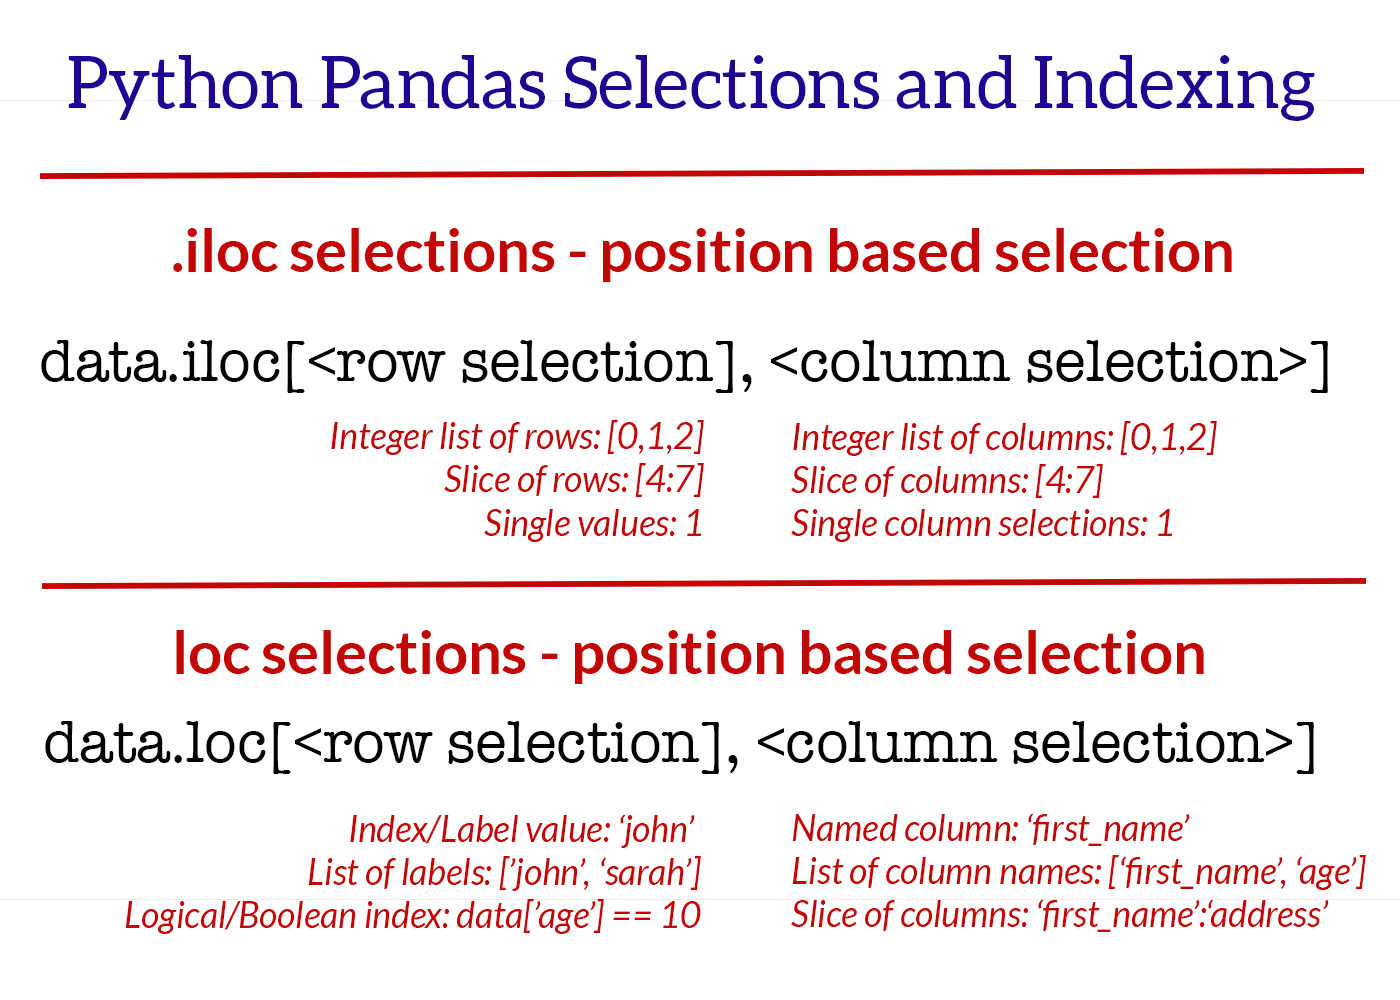

In [ ]:
surveys_df.iloc[0:6, 2:5]

,day,year,plot_id
0,16,1977,2
1,16,1977,3
2,16,1977,2
3,16,1977,7
4,16,1977,3
5,16,1977,1


Для loc цілі числа є значеннями індексів відповідних рядків, що в цілому аналогічно атрибуту iloc:

In [ ]:
display(surveys_df.loc[[0, 10], :])

surveys_df.iloc[[0, 10], :]

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
10,11,7,...,53,NaN


,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
10,11,7,...,53,NaN


При роботі з назвами та значеннями вони повинні знаходитись у датафреймі, інакше отримаємо KeyError. 
Для loc обидві межі є включними

In [ ]:
display(surveys_df.loc[0:5, :])

display(surveys_df.iloc[0:5, :])

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN
2,3,7,...,37,NaN
3,4,7,...,36,NaN
4,5,7,...,35,NaN
5,6,7,...,14,NaN


,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN
2,3,7,...,37,NaN
3,4,7,...,36,NaN
4,5,7,...,35,NaN


In [ ]:
# вибираємо стовпці за їх назвами для рядка з індексом 0
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [ ]:
display(surveys_df[0:1])
display(surveys_df.iloc[0:1])
display(surveys_df.loc[0:1])

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN


,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN


,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN


Сабсетинг може відбуватись з деяким критерієм. Наприклад, виберемо всі рядки, для яких рік буде 2002:

In [ ]:
surveys_df[surveys_df.year == 2002]

,record_id,month,...,hindfoot_length,weight
33320,33321,1,...,38,44
33321,33322,1,...,37,58
33322,33323,1,...,28,45
33323,33324,1,...,NaN,NaN
33324,33325,1,...,35,29
...,...,...,...,...,...
35544,35545,12,...,NaN,NaN
35545,35546,12,...,NaN,NaN
35546,35547,12,...,15,14
35547,35548,12,...,36,51


In [ ]:
surveys_df[surveys_df.year != 2002]

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN
2,3,7,...,37,NaN
3,4,7,...,36,NaN
4,5,7,...,35,NaN
...,...,...,...,...,...
33315,33316,12,...,NaN,NaN
33316,33317,12,...,NaN,NaN
33317,33318,12,...,NaN,NaN
33318,33319,12,...,NaN,NaN


Можемо комбінувати кілька критеріїв:

In [ ]:
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,...,hindfoot_length,weight
2270,2271,1,...,35,53
2271,2272,1,...,16,10
2272,2273,1,...,34,33
2273,2274,1,...,38,37
2274,2275,1,...,33,29
...,...,...,...,...,...
11222,11223,12,...,36,40
11223,11224,12,...,37,49
11224,11225,12,...,20,18
11225,11226,12,...,38,47


Для накладання умови вибірки можуть застосовуватись оператори ==, !=, >, <, >=, <=. Також допускається застосування логічних операторів ~ (заперечення), & (кон'юнкція), | (диз'юнкція). Популярною корисною функцією є isin(), яка перевіряє відповідність значень комірок одному зі значень з переліку

In [ ]:
surveys_df[surveys_df['species_id'].isin(['DO', 'PF', 'PE'])]

,record_id,month,...,hindfoot_length,weight
5,6,7,...,14,NaN
6,7,7,...,NaN,NaN
9,10,7,...,20,NaN
18,19,7,...,NaN,NaN
59,60,7,...,20,NaN
...,...,...,...,...,...
35505,35506,12,...,13,8
35515,35516,12,...,35,52
35517,35518,12,...,36,38
35526,35527,12,...,33,43


Функція isin() та попередні критерії демонструють принцип ___булевого індексування___, доступний для датафреймів pandas. Ви можете відбирати рядки зі значеннями, для яких певна умова буде істинною та відкидати ті рядки, де ця умова хибна. Наприклад, розглянемо результати роботи функції isnull(), яка перевіряє, чи є комірка порожньою:

In [ ]:
pd.isnull(surveys_df) # surveys_df.isnull()

,record_id,month,...,hindfoot_length,weight
0,False,False,...,False,True
1,False,False,...,False,True
2,False,False,...,False,True
3,False,False,...,False,True
4,False,False,...,False,True
...,...,...,...,...,...
35544,False,False,...,True,True
35545,False,False,...,True,True
35546,False,False,...,False,False
35547,False,False,...,False,False


In [ ]:
# щоб вибрати лише рядки, в яких є відсутні значення, можемо застосувати метод any()
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,...,hindfoot_length,weight
0,1,7,...,32,NaN
1,2,7,...,33,NaN
2,3,7,...,37,NaN
3,4,7,...,36,NaN
4,5,7,...,35,NaN
...,...,...,...,...,...
35530,35531,12,...,27,NaN
35543,35544,12,...,NaN,NaN
35544,35545,12,...,NaN,NaN
35545,35546,12,...,NaN,NaN





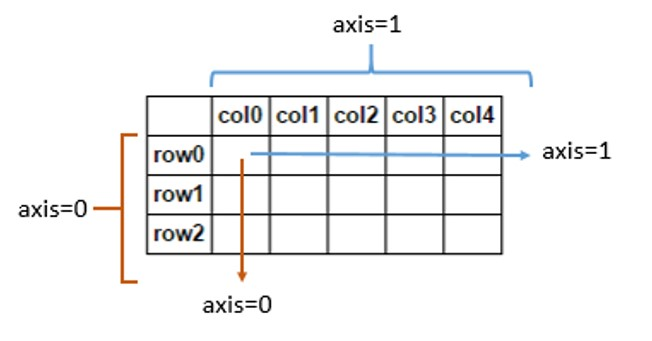

In [ ]:
# відберемо лише рядки, в яких відсутні значення маси (weight) тварини
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]['weight']
empty_weights

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
35530   NaN
35543   NaN
35544   NaN
35545   NaN
35548   NaN
Name: weight, Length: 3266, dtype: float64

In [ ]:
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])][['species_id', 'weight']]
empty_weights

,species_id,weight
0,NL,NaN
1,NL,NaN
2,DM,NaN
3,DM,NaN
4,DM,NaN
...,...,...
35530,PB,NaN
35543,US,NaN
35544,AH,NaN
35545,AH,NaN


### <font color = 'red'>Практичні завдання до питання 1</font>
1.1. Обчисліть відсоток відсутніх записів у кожному стовпці заданого датафрейму



In [ ]:
import pandas as pd
url = 'https://ndownloader.figshare.com/files/2292172'
surveys_df = pd.read_csv(url)
values = surveys_df.isna().sum() + surveys_df.count()
num_nan = (surveys_df.isna().sum() / values)
num_nan

record_id         0
month             0
day               0
year              0
plot_id           0
species_id        0
sex               0
hindfoot_length   0
weight            0
dtype: float64

1.2. Створіть датасет зі стовпцем, який міститиме всі ПІБ-и одногрупників. Програмно сформуйте нові стовпці First Name та Last Name шляхом розбиття ПІБ на ім'я та прізвище 

In [ ]:
cm = {'ПІБ': ['Березенко Марія Валеріївна', 'Ващенко Максим Миколайович', 'Гончарова Анна Артемівна', 'Дворяківська Єлизавета Георгіївна',
                            'Ігнатенко Віктор Васильович', 'Кучерук Євгеній Романович', 'Туренко Володимир Вікторович', 'Чухало Ілля Віталійович']}
ds = pd.DataFrame(cm)

fn = []
ln = []
for n in ds.values:
  for i in range(len(n)):
    fn.append(n[i].split(' ')[1])
    ln.append(n[i].split(' ')[0])

ds['First Name']=[fn[0], fn[1], fn[2], fn[3], fn[4], fn[5], fn[6], fn[7]]
ds['Last Name']=[ln[0], ln[1], ln[2], ln[3], ln[4], ln[5], ln[6], ln[7]]
ds

,ПІБ,First Name,Last Name
0,Березенко Марія Валеріївна,Марія,Березенко
1,Ващенко Максим Миколайович,Максим,Ващенко
2,Гончарова Анна Артемівна,Анна,Гончарова
3,Дворяківська Єлизавета Георгіївна,Єлизавета,Дворяківська
4,Ігнатенко Віктор Васильович,Віктор,Ігнатенко
5,Кучерук Євгеній Романович,Євгеній,Кучерук
6,Туренко Володимир Вікторович,Володимир,Туренко
7,Чухало Ілля Віталійович,Ілля,Чухало


1.3. Напишіть програму, яка для 2 серій Pandas буде виводити всі елементи, які не є для них спільними

In [ ]:
series_1 = pd.Series(['Apple', 'Microsoft', 'Amazon', 'Facebook', 'Google'])
series_2 = pd.Series(['Apple', 'Alphabet', 'Microsoft', 'Coca-Cola', 'Disney'])

for i in series_1.values:
  if i not in series_2.values:
    print(i)

for i in series_2.values:
  if i not in series_1.values:
    print(i)

Amazon
Facebook
Google
Alphabet
Coca-Cola
Disney


1.4. Напишіть програму, яка виведе позиції (індекси) всіх чисел, кратних 7, у вхідній серії. 

In [ ]:
a = [324, 364, 139, 178, 325, 473, 313, 99, -49, -15, -7, 66, 56, -83]
series = pd.Series(a)
for i in series.index:
  if series[i]%7 == 0:
    print(i)

1
8
10
12


1.5. Напишіть програму, яка приймає список позицій в серії та поверне відповідні елементи цієї серії

In [ ]:
positions = [0, 7, 5, 9, 11, 13]
for i in positions:
  print(series[i])

324
99
473
-15
66
-83


## 2. Фільтрація, групування та агрегація даних (3 бали)




### [Фільтрування даних](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html)

Фільтрація даних - один з початкових етапів підготовки даних для звітування чи предиктивного моделювання. До прикладу розглянемо датасет з деталями рейсів літаків, що вилетіли з Нью-Йорка в 2013 році.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv', usecols=range(1,17))
df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance',
       'hour', 'minute'],
      dtype='object')

Датасет містить 336776 рядків та 16 стовпців

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 41.1+ MB


Кількома способами спробуємо вибрати з датасету інформацію щодо рейсів JetBlue Airways, які мають код оператора (carrier code) з 2 символів - B6, а також виліт з аеропорту JFK (міжнародний аеропорт імені Джона Кеннеді)

Метод 1: датафреймовий підхід

Відфільтровані дані (після subsetting) is stored on new dataframe called newdf.
Symbol & refers to AND condition which means meeting both the criteria.
This part of code (df.origin == "JFK") & (df.carrier == "B6") returns True / False. True where condition matches and False where the condition does not hold. Later it is passed within df and returns all the rows corresponding to True. It returns 4166 rows.

In [ ]:
new_df = df[(df.origin == "JFK") & (df.carrier == "B6")]
new_df

,year,month,...,hour,minute
3,2013,1,...,5,44
8,2013,1,...,5,57
10,2013,1,...,5,58
11,2013,1,...,5,58
15,2013,1,...,5,59
...,...,...,...,...,...
336765,2013,9,...,22,40
336766,2013,9,...,22,40
336767,2013,9,...,22,41
336768,2013,9,...,23,7


У Pandas існує багато способів виконання фільтрації. Більш елегантним та читабельним є метод query(), з яким не потрібно вказувати додатково назву датафрейму при зверненні до стовпців:

In [ ]:
new_df = df.query('origin == "JFK" & carrier == "B6"')
new_df

,year,month,...,hour,minute
3,2013,1,...,5,44
8,2013,1,...,5,57
10,2013,1,...,5,58
11,2013,1,...,5,58
15,2013,1,...,5,59
...,...,...,...,...,...
336765,2013,9,...,22,40
336766,2013,9,...,22,40
336767,2013,9,...,22,41
336768,2013,9,...,23,7


Якщо фільтрування йтиме за значенням змінної, потрібно використати префікс @

In [ ]:
orig = 'JFK'
new_df = df.query('origin == @orig & carrier == "B6"')
new_df

,year,month,...,hour,minute
3,2013,1,...,5,44
8,2013,1,...,5,57
10,2013,1,...,5,58
11,2013,1,...,5,58
15,2013,1,...,5,59
...,...,...,...,...,...
336765,2013,9,...,22,40
336766,2013,9,...,22,40
336767,2013,9,...,22,41
336768,2013,9,...,23,7


Детальніше про використання змінних у методі query() можна знайти [тут](https://www.listendata.com/2020/12/how-to-use-variable-in-query-in-pandas.html).

Вище вже було показано, як для фільтрування можуть застосовуватись loc і iloc:

In [ ]:
new_df = df.loc[(df.origin == "JFK") & (df.carrier == "B6")]
new_df

,year,month,...,hour,minute
3,2013,1,...,5,44
8,2013,1,...,5,57
10,2013,1,...,5,58
11,2013,1,...,5,58
15,2013,1,...,5,59
...,...,...,...,...,...
336765,2013,9,...,22,40
336766,2013,9,...,22,40
336767,2013,9,...,22,41
336768,2013,9,...,23,7


In [ ]:
new_df = df.loc[df.index[0:5],["origin","dest"]]
new_df

,origin,dest
0,EWR,IAH
1,LGA,IAH
2,JFK,MIA
3,JFK,BQN
4,LGA,ATL


In [ ]:
new_df = df.loc[(df.origin != "JFK") & (df.carrier == "B6")]
new_df

,year,month,...,hour,minute
6,2013,1,...,5,55
17,2013,1,...,6,0
19,2013,1,...,6,1
43,2013,1,...,6,37
84,2013,1,...,7,32
...,...,...,...,...,...
336591,2013,9,...,18,37
336672,2013,9,...,19,55
336705,2013,9,...,20,30
336719,2013,9,...,20,50


In [ ]:
pd.unique(new_df.origin)


array(['EWR', 'LGA'], dtype=object)

In [ ]:
new_df = df[~((df.origin == "JFK") & (df.carrier == "B6"))]
new_df

,year,month,...,hour,minute
0,2013,1,...,5,17
1,2013,1,...,5,33
2,2013,1,...,5,42
4,2013,1,...,5,54
5,2013,1,...,5,54
...,...,...,...,...,...
336771,2013,9,...,NaN,NaN
336772,2013,9,...,NaN,NaN
336773,2013,9,...,NaN,NaN
336774,2013,9,...,NaN,NaN


Вибірка тільки присутніх у стовпці значень може відбуватись за допомогою методу notnull(): 

In [ ]:
new_df = df[df.origin.notnull()]
new_df

,year,month,...,hour,minute
0,2013,1,...,5,17
1,2013,1,...,5,33
2,2013,1,...,5,42
3,2013,1,...,5,44
4,2013,1,...,5,54
...,...,...,...,...,...
336771,2013,9,...,NaN,NaN
336772,2013,9,...,NaN,NaN
336773,2013,9,...,NaN,NaN
336774,2013,9,...,NaN,NaN


Інші сценарії фільтрації можете подивитись [тут](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html).

### [Групування та агрегація даних](https://towardsdatascience.com/aggregation-transform-filter-how-and-when-to-use-them-31ed7eb88d2e)

При групуванні даних у Pandas застосовується стратегія "split-apply-combine":
- _Розбиття (Splitting)_ даних на групи на основі деякого критерію.
- _Застосування (Applying)_ функції незалежно до кожної з груп.
- _Комбінування_ результатів у структуру даних.

З переліченого етап розбиття найбільш прямолінійний. Фактично, в багатьох ситуаціях ми можемо хотіти розділити датасет на групи та щось з ними робити. На apply-етапі може стати потрібною одна з наступних дій:
- _агрегація_: обчислюється ітогова статистика (-и) для кожної з груп. Наприклад:
  - знайти суми чи середні значення для груп.
  - знайти розміри груп, кількість елементів у них.
- _перетворення_: здійснення певних, специфічних для груп, обчислень та повернення об'єкту з подібною індексацією. Наприклад:
  - стандартизація даних (zscore) у групі.
  - заповнення відсутніх (NA) значень у групах за допомогою значення, отриманого з кожної групи.
- _фільтрація_: прибирає деякі групи згідно з груповими обчисленнями, що повертають результати True або False. Наприклад:
  - відкинути дані, які належать до груп з невеликою кількістю елементів.
  - відфільтрувати дані на основі суми чи середнього значення для групи.
- _певні комбінації з вище зазначеного_: GroupBy переглядатиме результати apply-етапу та намагатиметься повернути  скомбінований за суттю результат, якщо він не підходить до однієї з 2 категорій.

#### Агрегація
У своїй основі агрегація застосовує функції до стовпця (-ів). Спочатку вона розбиває повний датафрейм на частини (субдатафрейми) на основі стовпчика "Region". Потім застосовуються функції mean() до "Life Expectancy" та sum() до  "Population". Наприкінці результати комбінуються в серію, що перетворюється в датафрейм за допомогою reset_index(). Довжина отриманого датафрейму - кількість унікальних значень за результатами виконання groupby (тут - по "Region").

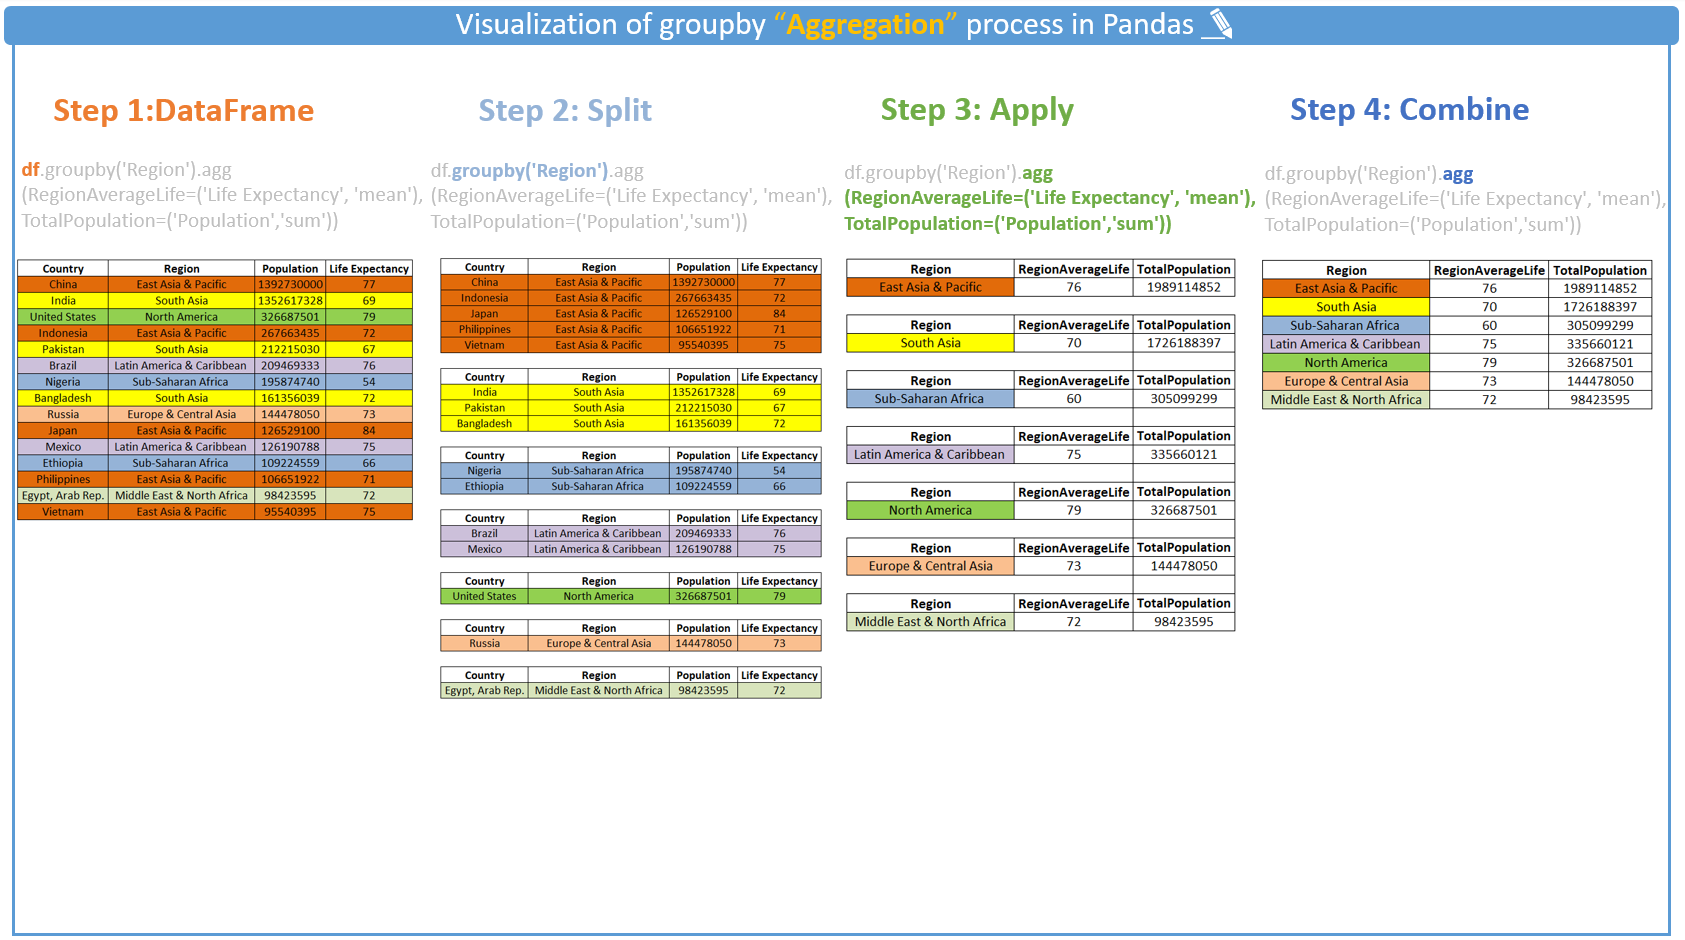

#### Перетворення (Transform)
У порівнянні з агрегацією, перетворення задіює додатковий крок, який називають _бродкастингом_. Він розповсюджує (broadcast) результати з субдатафреймів на початковий, повний датафрейм. Таким чином, перетворення завжди повертатиме серії однакової довжини порівняно з початковим датафреймом.
Типовий сценарій застосування перетворення - обчислення долей груп (percentage of group total). Тут це відсотки населення країни в її регіоні, зокрема, Індії в регіоні Південної Азії.


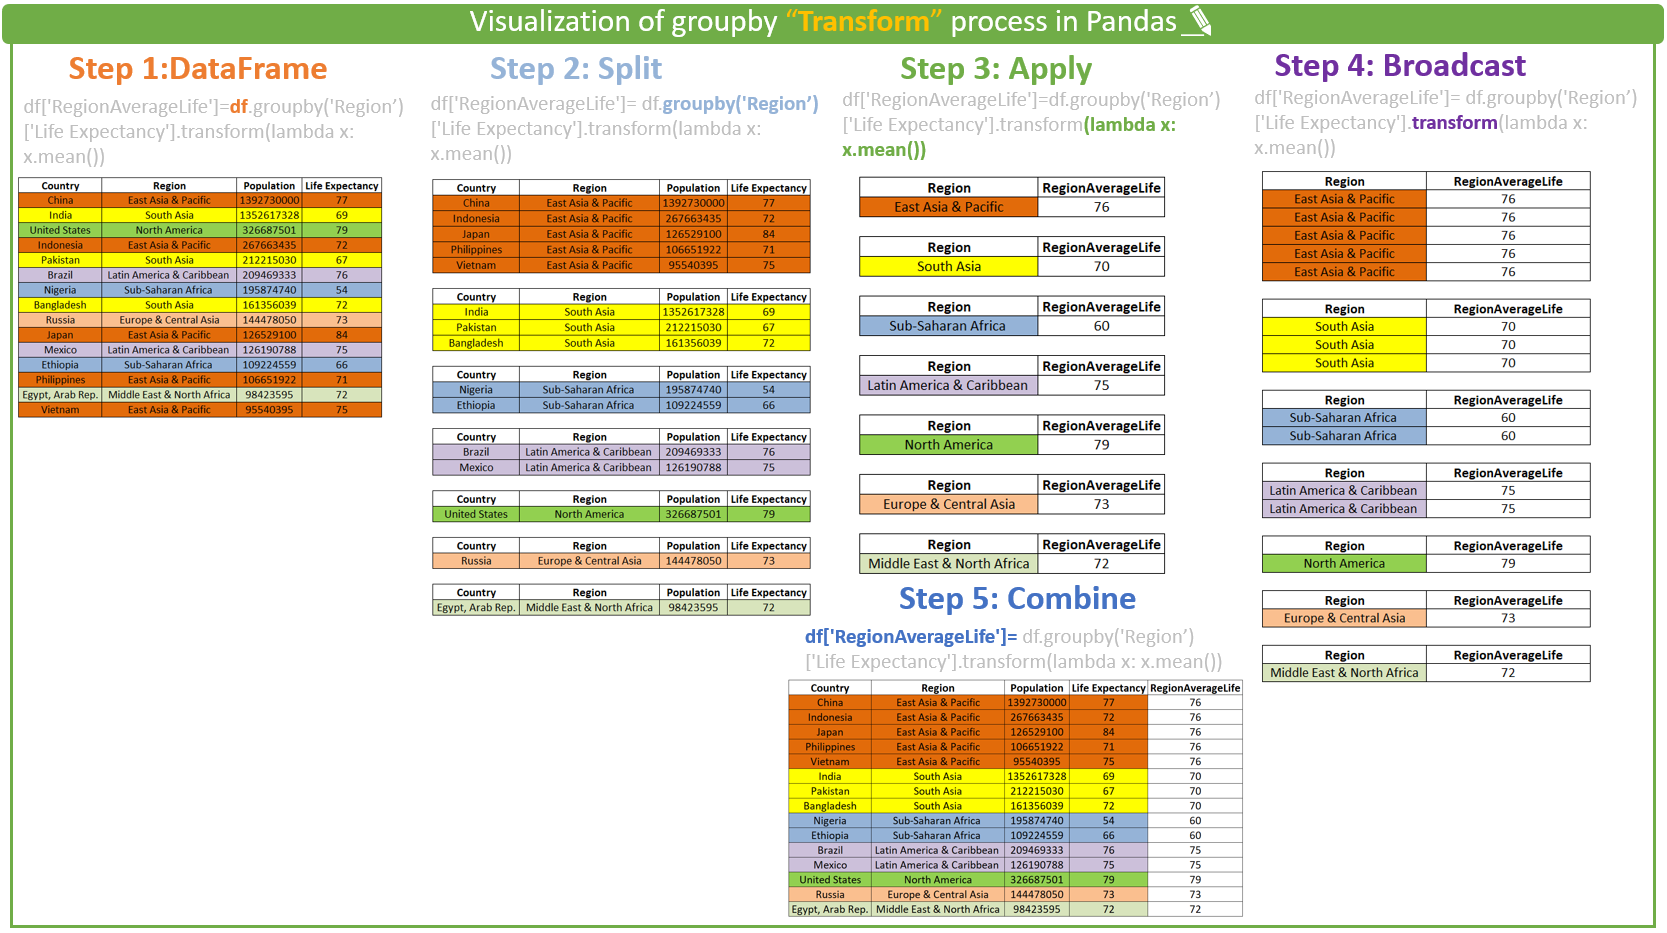

### Фільтрація
Порівняно з перетворенням, фільтрація отримує ще один додатковий крок. Після отримання результатів з субдатафреймів ми відфільтровуємо ці результати (тут це "RegionAverageLife" > 75). Так отримаємо урізану версію повного дтафрейму.


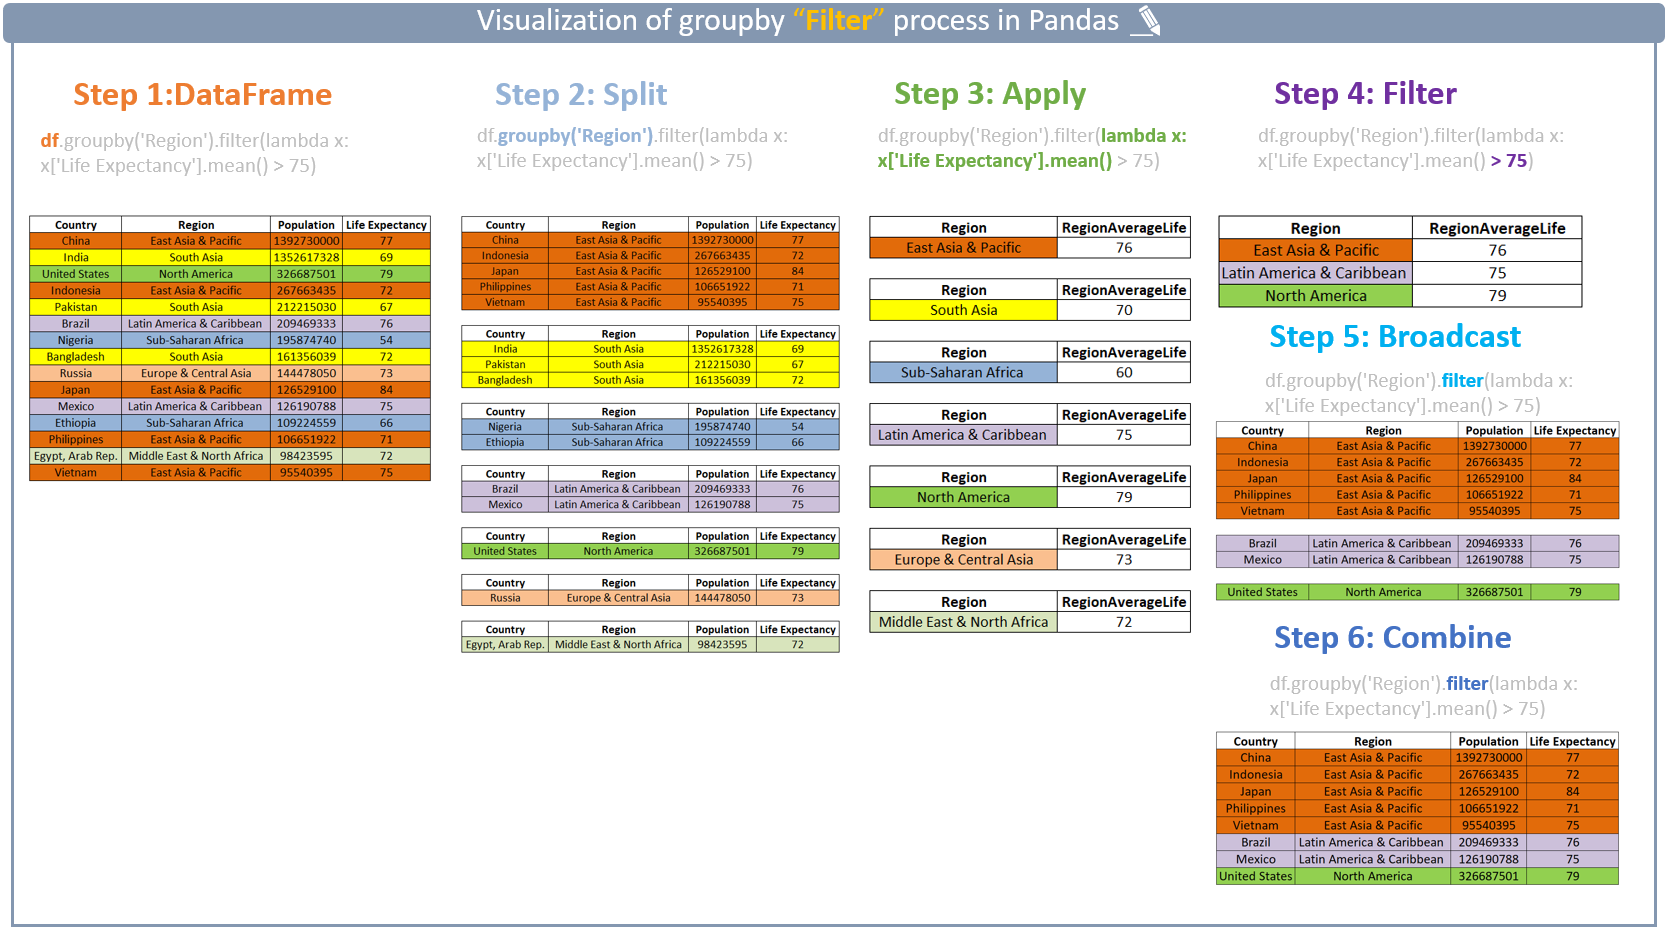

### <font color = 'red'>Практичні завдання до питання 2</font>
Отримайте дані з датасету щодо нобелівських лауреатів.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/x5or6/A-Visual-History-of-Nobel-Prize-Winners/master/archive.csv'
nobel_df = pd.read_csv(url, sep = ',')
nobel_df

,Year,Category,...,Death City,Death Country
0,1901,Chemistry,...,Berlin,Germany
1,1901,Literature,...,Châtenay,France
2,1901,Medicine,...,Marburg,Germany
3,1901,Peace,...,Heiden,Switzerland
4,1901,Peace,...,Paris,France
...,...,...,...,...,...
964,2016,Medicine,...,NaN,NaN
965,2016,Peace,...,NaN,NaN
966,2016,Physics,...,NaN,NaN
967,2016,Physics,...,NaN,NaN


#### Напишіть код, який дасть відповіді на наступні запитання:
- Скільки рядків та стовпців у датафреймі?
- Як називаються стовпці датафрейму?
- Який тип даних у кожного стовпця?

In [ ]:
print('Rows: ', len(nobel_df.index), '\nColumns:', len(nobel_df.columns))

print(nobel_df.dtypes)

Rows:  969 
Columns: 18
Year                     int64
Category                object
Prize                   object
Motivation              object
Prize Share             object
Laureate ID              int64
Laureate Type           object
Full Name               object
Birth Date              object
Birth City              object
Birth Country           object
Sex                     object
Organization Name       object
Organization City       object
Organization Country    object
Death Date              object
Death City              object
Death Country           object
dtype: object


- Відсортуйте датафрейм за стовпцем Full Name.

In [ ]:
nobel_df.sort_values(by=['Full Name'])

,Year,Category,...,Death City,Death Country
748,2001,Economics,...,NaN,NaN
478,1975,Physics,...,Copenhagen,Denmark
785,2004,Chemistry,...,NaN,NaN
547,1982,Chemistry,...,NaN,NaN
522,1979,Physics,...,Oxford,United Kingdom
...,...,...,...,...,...
954,2015,Medicine,...,NaN,NaN
581,1986,Chemistry,...,NaN,NaN
799,2005,Chemistry,...,Tours,France
741,2000,Physics,...,NaN,NaN


- Визначте, скільки чоловіків та скільки жінок отримало нобелівські премії

In [ ]:
Sex_list = nobel_df['Sex'].tolist()
Males = []
Females = []
for i in Sex_list:
  if i == 'Male':
    Males.append(i)
  elif i == 'Female':
    Females.append(i)
print('Males: ', len(Males),'\nFemales', len(Females))

Males:  893 
Females 50


- Уроженці якої країни отримали найбільше нобелівських премій?

In [ ]:
Country = pd.Series(nobel_df['Birth Country'].tolist())
Country.mode()

0    United States of America
dtype: object

- Як звати першу жінку, яка отримала Нобелівську премію?

In [ ]:
for i in Sex_list:
  if i == 'Female':
    first = Sex_list.index(i)
    break
list_of_names = nobel_df['Full Name'].tolist()
list_of_names[first]

'Marie Curie, née Sklodowska'

- Хто з науковців отримав Нобелівську премію посмертно?

In [ ]:
names = nobel_df['Full Name'].tolist()
date_of_death = nobel_df['Death Date'].isna().tolist()
date = nobel_df['Death Date'].tolist()
year = nobel_df['Year'].tolist()
for i in range(len(year)):
  if date_of_death[i] == False:
    year_of_death = int(date[i][0:4])
    if year_of_death <= year[i]:
      print(names[i])

Erik Axel Karlfeldt
Dag Hjalmar Agne Carl Hammarskjöld
William Vickrey
Ralph M. Steinman


- Визначте науковців, які отримали більш, ніж одну Нобелівську премію? Представниками яких організацій вони були?

In [ ]:
for i in names:
  counter = names.count(i)
  if counter > 1:
    print(i)

Marie Curie, née Sklodowska
Paul Ehrlich
Paul Ehrlich
Marie Curie, née Sklodowska
Comité international de la Croix Rouge (International Committee of the Red Cross)
Carl Bosch
Carl Bosch
Friedrich Bergius
Friedrich Bergius
William Parry Murphy
William Parry Murphy
Petrus (Peter) Josephus Wilhelmus Debye
Petrus (Peter) Josephus Wilhelmus Debye
Richard Kuhn
Richard Kuhn
Adolf Friedrich Johann Butenandt
Adolf Friedrich Johann Butenandt
Comité international de la Croix Rouge (International Committee of the Red Cross)
Antonio Caetano de Abreu Freire Egas Moniz
Antonio Caetano de Abreu Freire Egas Moniz
Hideki Yukawa
Hideki Yukawa
Hermann Staudinger
Hermann Staudinger
Fritz Albert Lipmann
Fritz Albert Lipmann
Linus Carl Pauling
John Franklin Enders
John Franklin Enders
Office of the United Nations High Commissioner for Refugees (UNHCR)
Walther Bothe
Walther Bothe
Werner Forssmann
Werner Forssmann
John Bardeen
Frederick Sanger
Igor Yevgenyevich Tamm
Igor Yevgenyevich Tamm
Il´ja Mikhailovich Fr

- Додайте стовпчик з віком нобелівських лауреатів на момент отримання премії (різниця з роком народення). Якого максимального та мінімального віку були лауреати-чоловіки та лауреати-жінки

In [ ]:
import numpy as np

ages = []
date_of_birth = nobel_df['Birth Date'].isna().tolist()
dates = nobel_df['Birth Date'].astype('string').tolist()
for i in range(len(year)):
  if date_of_birth[i] == False:
    birth_year = int(dates[i][0:4])
    age = year[i] - birth_year
    ages.append(age)
  else:
    ages.append(np.nan)

nobel_df['Age'] = ages

ages_list = nobel_df['Age'].isna().tolist()
max_m = 0
max_f = 0
for i in range(len(ages)):
  if ages_list[i] == False:
    if ages[i] > max_m and Sex_list[i] == 'Male':
      max_m = ages[i]
    elif ages[i] > max_f and Sex_list[i] == 'Female':
      max_f = ages[i]

print('Max for males: ', max_m, '\nMax for females: ', max_f)

Max for males:  90 
Max for females:  88


- для кожної комбінації категорії та статі обчисліть середній вік лауреата.

In [ ]:
categories = nobel_df['Category'].tolist()
passed_cat = []
for i in range(len(categories)):
  if categories[i] not in passed_cat:
    passed_cat.append(categories[i])
    m_age = 0
    m_it = 0
    f_age = 0
    f_it = 0
    for a in range(len(ages_list)):
      if ages_list[a] == False:
        if Sex_list[a] == 'Male' and categories[i] == categories[a]:
          m_age += ages[a]
          m_it += 1 
        if Sex_list[a] == 'Female' and categories[i] == categories[a]:
          f_age += ages[a]
          f_it += 1
    if m_it != 0:
      average_m = m_age / m_it
      print('In', categories[i], 'category average age for mens: ', average_m)
    else:
      print("In this category mens didn't receive the Nobel Prize")
    if f_it != 0:
      average_f = f_age / f_it
      print('In', categories[i], 'category average age for womens: ', average_f)
    else:
      print("In this category womens didn't receive the Nobel Prize")

In Chemistry category average age for mens:  58.27513227513227
In Chemistry category average age for womens:  51.5
In Literature category average age for mens:  64.8989898989899
In Literature category average age for womens:  63.07142857142857
In Medicine category average age for mens:  57.674418604651166
In Medicine category average age for womens:  62.583333333333336
In Peace category average age for mens:  63.09090909090909
In Peace category average age for womens:  52.0625
In Physics category average age for mens:  55.93577981651376
In Physics category average age for womens:  46.5
In Economics category average age for mens:  66.82716049382717
In Economics category average age for womens:  76.0


- для кожної категорії покажіть відсоток чоловіків та жінок

In [ ]:
num_m = 0
num_f = 0
passed_cat = []
for i in range(len(categories)):
  if categories[i] not in passed_cat:
    passed_cat.append(categories[i])
    for a in range(len(Sex_list)):
      if Sex_list[a] == 'Male' and categories[i] == categories[a]:
        num_m += 1
      if Sex_list[a] == 'Female' and categories[i] == categories[a]:
        num_f += 1
    percentage_m = num_m/(num_m + num_f)*100
    percentage_f = num_f/(num_m + num_f)*100
    print('In', categories[i], 'category percentage of mens: ', ('{:.2f}').format(percentage_m), '%\nIn', categories[i], 'category percentage of womens: ', ('{:.2f}').format(percentage_f), '%')

In Chemistry category percentage of mens:  97.94 %
In Chemistry category percentage of womens:  2.06 %
In Literature category percentage of mens:  94.14 %
In Literature category percentage of womens:  5.86 %
In Medicine category percentage of mens:  94.38 %
In Medicine category percentage of womens:  5.62 %
In Peace category percentage of mens:  92.79 %
In Peace category percentage of womens:  7.21 %
In Physics category percentage of mens:  94.42 %
In Physics category percentage of womens:  5.58 %
In Economics category percentage of mens:  94.70 %
In Economics category percentage of womens:  5.30 %


## 3. Очистка датасетів за допомогою бібліотеки Pandas (2 бали)

#### Перед тим, як подавати дані моделі машинного навчання, їх слід попередньо підготувати та очистити. Для очистки датасету здійснюється [3 обов'язкових операції](https://towardsdatascience.com/3-steps-to-a-clean-dataset-with-pandas-2b80ef0c81ae):
- видалення ознак;
- видалення відсутніх значень;
- форматування даних.

#### На першому етапі слід здійснити швидке дослідження датасету, щоб визначити, які ознаки погано корелюють (not highly correlated) з результатом (output), який ви хочете передбачити. Зробити це можна кількома способами:
- виконати кореляційний аналіз величин (feature variables);
- перевірити, у скількох рядках відсутні значення для величини (стовпця). Якщо в стовпці відсутні 90% його даних, ймовірно, розумніше просто виключити його з датасету;
- розглянути природу величини. Чи справді вона корисна з практичної точки зору? Видаляти відповідний стовпчик слід лише за значної впевненості в тому, що він не стане корисним.

#### Відповідний код у Pandas може виглядати так:
```python
# обчислення коефіцієнтів кореляції
x_cols = [col for col in data.columns if col not in ['output']]

for col in x_cols:
    corr_coeffs = np.corrcoef(data[col].values, data.output.values)
  
# Отримуємо кількість відсутніх значень для кожного стовця (величини).
data.isnull().sum()

# Видаляємо стовпець за його назвою (feature_name) 
data = data.drop('feature_name', 1)
```

#### На другому етапі видаляємо відсутні значення. На даний момент уже видалені стовпці з високим відсотком порожніх значень. Тепер необхідно обробити відстуні значення в стовпцях, які залишились. Знову маємо кілька опцій:
- заповнити порожні комірки довільними значеннями;
- заповнити порожні комірки статистично обчисленим значенням;
- ігнорувати відсутні значення.



#### Перше з даного переліку можна здійснити, якщо вам відоме хороше типове значення. Проте набагато частіше віддають перевагу обчисленню цього значення шляхом проведення деякого статистичного аналізу. Такий аналіз робить обчислене значення ближчим до реальних даних з датасету. Остання опція може бути задіяною, коли датасет достатньо великий, щоб допускати видалення деяких рядків.

#### Форматування даних. При зборі даних у датасети слід пам'ятати, що часто ці дані вводять люди як звичайний текст. Це може призвести до проблем та неточностей у даних. Наприклад, різні люди можуть вносити штат Каліфорнія як CA, C.A, california, Cali. Повинен бути єдиний стандартизований формат запису. Крім того, можуть бути ситуації, коли дані записано неперервно, а нам потрібно перетворити запис у дискретний, чи навпаки.
```python
# Форматування даних
data['state'] = data['state'].str.upper() # переписуємо всі значення капсом
data['state'] = data['state'].replace(    # змінюємо форматування рядка
                                      to_replace=["CA", "C.A", "CALI"], 
                                      value=["CALIFORNIA", "CALIFORNIA", "CALIFORNIA"])

# Дати й час досить поширені в великих датасетах.
# Хороша практика - перетворити відповідні рядки в об'єкти datetime зі стандартним форматом
data["time"] = pd.to_datetime(data["time"], format='%Y-%m-%d', errors='ignore')

# дискретизація неперервних величин: ріст описано в дюймах
# утворюємо кілька бінів (bins, точки дискретизації) з мітками (labels)
data["height"] = pd.cut(data['height'],
                        bins=[0, 48, 60, 66, 72, 78, 100], 
                        labels=["Super Short","Short", "Average", "Above Average","Tall","Super Tall"])

# заміняємо рядкові значення на деякі дійсні числа, з якими зможуть працювати наші ML-моделі
mapping = {'Adult Woman': 1, 'Adult Man': 2, "Child": 3}
data"Person" = data["Person"].replace(mapping)
```

Детальніше про очистку даних почитайте [тут](https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/).

Про поводження з відсутніми значеннями в датасеті більш детально описано в [статті](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/).

### <font color = 'red'>Практичні завдання до питання 3</font>

Оформіть блокнот для глави 4 "Identifying Missing Values and Outliers in Subsets of Data" з книги "Python Data Cleaning Cookbook" (2020) за авторством Michael Walker.
Датасет для завантаження представлений в посиланні. Він уже дещо відрізняється від наведеного в книзі, тому ретельно відберіть актуальний пояснюючий текст та додайте власний, якщо будуть суттєві зміни.



Спочатку імпортуємо потрібні бібліотеки та відповідний CSV-файл, а також визначаємо набір колонок з демографічними показниками: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covidtotals = pd.read_csv(url)
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']
demovars = ['population', 'population_density', 'median_age', 'gdp_per_capita', 'hospital_beds_per_thousand']

covidtotals.columns.to_list()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

Перевіримо демографічні колонки (величини) на відсутні дані. 

Задаємо axis = 0 (по дефолту), щоб перевірити кількість країн, у яких існують відсутні дані в демографічних величинах 

In [ ]:
# знаходимо кількість порожніх комірок по окремих стовпцях
covidtotals[demovars].isnull().sum(axis = 0)

population                     1148
population_density            20408
median_age                    32586
gdp_per_capita                33456
hospital_beds_per_thousand    50333
dtype: int64

In [ ]:
# підраховуємо, скільки відсутніх значень у кожному рядку
# 0 - повністю заповнені рядки, на даний момент 111497
demovarsmisscnt = covidtotals[demovars].isnull().sum(axis = 1)
print(demovarsmisscnt.value_counts())


0    128765
1     23380
4     16846
2     10176
3      7025
5      1148
dtype: int64


Перелічимо країни, для яких 3 чи більше величини з демографічних даних відсутні

In [ ]:
covidtotals.loc[demovarsmisscnt >= 3, ['location'] + demovars].head(10).T

,814,815,...,822,823
location,Africa,Africa,...,Africa,Africa
population,1373486472,1373486472,...,1373486472,1373486472
population_density,NaN,NaN,...,NaN,NaN
median_age,NaN,NaN,...,NaN,NaN
gdp_per_capita,NaN,NaN,...,NaN,NaN
hospital_beds_per_thousand,NaN,NaN,...,NaN,NaN


...